In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

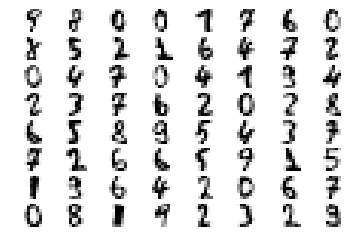

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 3)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.57892 stdev: 0.27326
Best fitness: 0.94310 - size: (2, 13) - species 2 - id 190
Average adjusted fitness: 0.482
Mean genetic distance 2.797, standard deviation 0.439
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 39.734 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.70974 stdev: 0.25288
Best fitness: 0.96289 - size: (3, 15) - species 2 - id 352
Average adjusted fitness: 0.586
Mean genetic distance 2.910, standard deviation 0.486
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 43.742 sec (41.738 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.76951 stdev: 0.21685
Best fitness: 0.96289 - size: (3, 15) - species 2 - id 352
Average adjusted fitness: 0.632
Mean genetic distance 3.056, standard deviation 0.489
Population of 199 members in 26 species
Total extin

Mean genetic distance 3.047, standard deviation 0.494
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 29.764 sec (28.521 average)
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.54777 stdev: 0.21565
Best fitness: 0.89116 - size: (2, 13) - species 1 - id 139
Average adjusted fitness: 0.389
Mean genetic distance 2.921, standard deviation 0.480
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 28.318 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67980 stdev: 0.17927
Best fitness: 0.89981 - size: (2, 13) - species 18 - id 313
Average adjusted fitness: 0.468
Mean genetic distance 3.035, standard deviation 0.480
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 25.692 sec (27.005 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69026 stdev: 0.18435
Best fitness: 0.89981 - size: (2, 1

Population's average fitness: 0.55095 stdev: 0.06718
Best fitness: 0.72975 - size: (3, 13) - species 6 - id 320
Average adjusted fitness: 0.172
Mean genetic distance 3.003, standard deviation 0.477
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 27.499 sec (25.636 average)
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.54627 stdev: 0.20985
Best fitness: 0.83055 - size: (2, 13) - species 5 - id 33
Average adjusted fitness: 0.403
Mean genetic distance 2.917, standard deviation 0.470
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 24.106 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.68942 stdev: 0.17318
Best fitness: 0.86889 - size: (3, 14) - species 20 - id 369
Average adjusted fitness: 0.507
Mean genetic distance 3.026, standard deviation 0.457
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 26.882 sec (

Mean genetic distance 2.980, standard deviation 0.520
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 26.984 sec (25.543 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54957 stdev: 0.07900
Best fitness: 0.70501 - size: (2, 13) - species 18 - id 484
Average adjusted fitness: 0.243
Mean genetic distance 3.015, standard deviation 0.503
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 27.096 sec (26.060 average)
number of class1:489
number of class2:1128

 ****** Running generation 0 ****** 

Population's average fitness: 0.53161 stdev: 0.15576
Best fitness: 0.75325 - size: (2, 13) - species 2 - id 75
Average adjusted fitness: 0.349
Mean genetic distance 2.922, standard deviation 0.458
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 24.286 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63154 stdev: 0.12445
Best fitness: 0.83055 - size: (2, 14

Population's average fitness: 0.53045 stdev: 0.10007
Best fitness: 0.74273 - size: (3, 15) - species 2 - id 234
Average adjusted fitness: 0.214
Mean genetic distance 2.981, standard deviation 0.472
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 25.420 sec (25.088 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56328 stdev: 0.09316
Best fitness: 0.74273 - size: (3, 15) - species 11 - id 234
Average adjusted fitness: 0.233
Mean genetic distance 2.957, standard deviation 0.466
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 26.567 sec (25.581 average)
number of class1:323
number of class2:1294

 ****** Running generation 0 ****** 

Population's average fitness: 0.58406 stdev: 0.20370
Best fitness: 0.88374 - size: (2, 13) - species 6 - id 106
Average adjusted fitness: 0.433
Mean genetic distance 2.858, standard deviation 0.450
Population of 200 members in 21 species
Total extinctions: 0
Generation 

Mean genetic distance 2.894, standard deviation 0.506
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 24.246 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52514 stdev: 0.06479
Best fitness: 0.68831 - size: (2, 13) - species 5 - id 233
Average adjusted fitness: 0.175
Mean genetic distance 2.981, standard deviation 0.536
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 25.366 sec (24.806 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55419 stdev: 0.06699
Best fitness: 0.77551 - size: (2, 12) - species 6 - id 436
Average adjusted fitness: 0.190
Mean genetic distance 3.019, standard deviation 0.537
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 27.268 sec (25.627 average)
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.54546 stdev: 0.15470
Best fitness: 0.80767 - size: (2, 13


 ****** Running generation 0 ****** 

Population's average fitness: 0.47878 stdev: 0.09339
Best fitness: 0.73284 - size: (2, 13) - species 4 - id 78
Average adjusted fitness: 0.186
Mean genetic distance 2.806, standard deviation 0.447
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 24.331 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53031 stdev: 0.10205
Best fitness: 0.73593 - size: (2, 13) - species 11 - id 326
Average adjusted fitness: 0.216
Mean genetic distance 2.935, standard deviation 0.464
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 26.720 sec (25.526 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55886 stdev: 0.10020
Best fitness: 0.74335 - size: (3, 13) - species 1 - id 513
Average adjusted fitness: 0.214
Mean genetic distance 3.009, standard deviation 0.482
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 27.224 sec (26.0

Mean genetic distance 3.002, standard deviation 0.477
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 26.917 sec (25.898 average)
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.46517 stdev: 0.09007
Best fitness: 0.68955 - size: (2, 13) - species 4 - id 22
Average adjusted fitness: 0.181
Mean genetic distance 2.890, standard deviation 0.523
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 24.706 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53814 stdev: 0.09048
Best fitness: 0.73469 - size: (3, 15) - species 8 - id 359
Average adjusted fitness: 0.235
Mean genetic distance 2.991, standard deviation 0.499
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 26.093 sec (25.399 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55962 stdev: 0.10007
Best fitness: 0.76129 - size: (3, 15) 

Population's average fitness: 0.56974 stdev: 0.10256
Best fitness: 0.79035 - size: (2, 14) - species 3 - id 248
Average adjusted fitness: 0.262
Mean genetic distance 2.974, standard deviation 0.494
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 31.402 sec (28.999 average)
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.47028 stdev: 0.15376
Best fitness: 0.74335 - size: (2, 13) - species 7 - id 140
Average adjusted fitness: 0.221
Mean genetic distance 2.869, standard deviation 0.441
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 24.756 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54510 stdev: 0.15193
Best fitness: 0.77798 - size: (3, 15) - species 3 - id 363
Average adjusted fitness: 0.325
Mean genetic distance 3.044, standard deviation 0.482
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 25.780 sec (

Mean genetic distance 3.052, standard deviation 0.542
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 25.510 sec (24.835 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57123 stdev: 0.07750
Best fitness: 0.70934 - size: (3, 14) - species 23 - id 464
Average adjusted fitness: 0.203
Mean genetic distance 3.003, standard deviation 0.494
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 27.041 sec (25.570 average)
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.49766 stdev: 0.07287
Best fitness: 0.75758 - size: (2, 13) - species 3 - id 124
Average adjusted fitness: 0.248
Mean genetic distance 2.878, standard deviation 0.457
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 23.921 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53833 stdev: 0.07162
Best fitness: 0.78231 - size: (2, 14

Population's average fitness: 0.52238 stdev: 0.05596
Best fitness: 0.69697 - size: (2, 13) - species 3 - id 155
Average adjusted fitness: 0.165
Mean genetic distance 3.062, standard deviation 0.500
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 25.410 sec (24.963 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53194 stdev: 0.06077
Best fitness: 0.70068 - size: (2, 14) - species 10 - id 517
Average adjusted fitness: 0.178
Mean genetic distance 3.099, standard deviation 0.505
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 26.287 sec (25.404 average)
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.49185 stdev: 0.09193
Best fitness: 0.73346 - size: (2, 13) - species 2 - id 134
Average adjusted fitness: 0.181
Mean genetic distance 2.948, standard deviation 0.512
Population of 201 members in 24 species
Total extinctions: 0
Generation t

Mean genetic distance 3.032, standard deviation 0.516
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 24.512 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53547 stdev: 0.06457
Best fitness: 0.72418 - size: (2, 14) - species 17 - id 289
Average adjusted fitness: 0.179
Mean genetic distance 3.048, standard deviation 0.522
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 26.293 sec (25.402 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54900 stdev: 0.06767
Best fitness: 0.72418 - size: (2, 14) - species 17 - id 289
Average adjusted fitness: 0.177
Mean genetic distance 3.062, standard deviation 0.507
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 27.511 sec (26.105 average)
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.49700 stdev: 0.10864
Best fitness: 0.78788 - size: (2, 1


 ****** Running generation 0 ****** 

Population's average fitness: 0.48782 stdev: 0.08723
Best fitness: 0.69697 - size: (2, 13) - species 6 - id 67
Average adjusted fitness: 0.174
Mean genetic distance 2.838, standard deviation 0.453
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 23.960 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54573 stdev: 0.08340
Best fitness: 0.70377 - size: (3, 14) - species 7 - id 246
Average adjusted fitness: 0.170
Mean genetic distance 2.985, standard deviation 0.428
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 25.515 sec (24.737 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54913 stdev: 0.09164
Best fitness: 0.70748 - size: (4, 16) - species 15 - id 463
Average adjusted fitness: 0.205
Mean genetic distance 3.031, standard deviation 0.460
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 27.059 sec (25.5

Mean genetic distance 3.010, standard deviation 0.485
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 26.010 sec (25.155 average)
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.49336 stdev: 0.05567
Best fitness: 0.70563 - size: (2, 13) - species 1 - id 119
Average adjusted fitness: 0.192
Mean genetic distance 2.890, standard deviation 0.506
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 23.681 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52914 stdev: 0.05611
Best fitness: 0.70748 - size: (3, 15) - species 1 - id 373
Average adjusted fitness: 0.195
Mean genetic distance 2.966, standard deviation 0.493
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 25.200 sec (24.441 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54742 stdev: 0.06795
Best fitness: 0.70748 - size: (3, 15)

Population's average fitness: 0.56055 stdev: 0.09349
Best fitness: 0.75325 - size: (3, 14) - species 30 - id 521
Average adjusted fitness: 0.339
Mean genetic distance 3.036, standard deviation 0.462
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 26.937 sec (25.678 average)
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.48809 stdev: 0.08464
Best fitness: 0.71985 - size: (2, 13) - species 2 - id 161
Average adjusted fitness: 0.157
Mean genetic distance 2.906, standard deviation 0.455
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 23.537 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53036 stdev: 0.08520
Best fitness: 0.71985 - size: (2, 13) - species 2 - id 161
Average adjusted fitness: 0.192
Mean genetic distance 2.975, standard deviation 0.470
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 26.278 sec (

Mean genetic distance 3.050, standard deviation 0.497
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 24.083 sec (24.005 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55960 stdev: 0.09916
Best fitness: 0.81014 - size: (3, 15) - species 5 - id 532
Average adjusted fitness: 0.248
Mean genetic distance 3.087, standard deviation 0.501
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 24.793 sec (24.268 average)
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.48567 stdev: 0.08837
Best fitness: 0.71800 - size: (2, 13) - species 4 - id 42
Average adjusted fitness: 0.176
Mean genetic distance 2.912, standard deviation 0.499
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 22.450 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53039 stdev: 0.09517
Best fitness: 0.75634 - size: (3, 15) 

Population's average fitness: 0.55713 stdev: 0.15590
Best fitness: 0.80025 - size: (3, 15) - species 7 - id 346
Average adjusted fitness: 0.315
Mean genetic distance 2.955, standard deviation 0.500
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 19.938 sec (19.822 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60547 stdev: 0.13087
Best fitness: 0.80148 - size: (4, 16) - species 7 - id 543
Average adjusted fitness: 0.345
Mean genetic distance 3.022, standard deviation 0.506
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 20.891 sec (20.178 average)
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.47306 stdev: 0.14964
Best fitness: 0.76005 - size: (2, 13) - species 6 - id 183
Average adjusted fitness: 0.223
Mean genetic distance 2.892, standard deviation 0.505
Population of 200 members in 20 species
Total extinctions: 0
Generation t

Mean genetic distance 2.826, standard deviation 0.444
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 17.025 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56431 stdev: 0.08845
Best fitness: 0.76500 - size: (3, 15) - species 1 - id 275
Average adjusted fitness: 0.190
Mean genetic distance 2.932, standard deviation 0.474
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.861 sec (17.443 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57430 stdev: 0.08852
Best fitness: 0.76500 - size: (3, 15) - species 1 - id 275
Average adjusted fitness: 0.237
Mean genetic distance 2.982, standard deviation 0.488
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.411 sec (18.099 average)
number of class1:639
number of class2:978

 ****** Running generation 0 ****** 

Population's average fitness: 0.51590 stdev: 0.08659
Best fitness: 0.69264 - size: (2, 13)


 ****** Running generation 0 ****** 

Population's average fitness: 0.50035 stdev: 0.04954
Best fitness: 0.62338 - size: (2, 13) - species 5 - id 93
Average adjusted fitness: 0.157
Mean genetic distance 2.903, standard deviation 0.492
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 17.638 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52082 stdev: 0.05230
Best fitness: 0.66357 - size: (2, 14) - species 22 - id 375
Average adjusted fitness: 0.148
Mean genetic distance 2.958, standard deviation 0.449
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 18.255 sec (17.947 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53933 stdev: 0.05399
Best fitness: 0.67161 - size: (2, 15) - species 19 - id 520
Average adjusted fitness: 0.116
Mean genetic distance 3.011, standard deviation 0.455
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 18.986 sec (18.

Mean genetic distance 2.993, standard deviation 0.493
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 18.888 sec (18.300 average)
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49566 stdev: 0.05950
Best fitness: 0.70377 - size: (2, 13) - species 5 - id 130
Average adjusted fitness: 0.200
Mean genetic distance 2.951, standard deviation 0.527
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.412 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53075 stdev: 0.06209
Best fitness: 0.70377 - size: (2, 13) - species 1 - id 130
Average adjusted fitness: 0.154
Mean genetic distance 3.022, standard deviation 0.524
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 18.570 sec (17.991 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54419 stdev: 0.06554
Best fitness: 0.70934 - size: (3, 15)

Population's average fitness: 0.54288 stdev: 0.06660
Best fitness: 0.70377 - size: (2, 13) - species 18 - id 85
Average adjusted fitness: 0.201
Mean genetic distance 3.064, standard deviation 0.454
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 19.227 sec (18.213 average)
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.47817 stdev: 0.08292
Best fitness: 0.68275 - size: (2, 13) - species 4 - id 140
Average adjusted fitness: 0.210
Mean genetic distance 2.858, standard deviation 0.473
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.098 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53752 stdev: 0.08785
Best fitness: 0.70315 - size: (3, 15) - species 8 - id 366
Average adjusted fitness: 0.211
Mean genetic distance 3.016, standard deviation 0.480
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 18.888 sec (1

Mean genetic distance 3.023, standard deviation 0.495
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 18.336 sec (17.912 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58194 stdev: 0.08078
Best fitness: 0.72356 - size: (3, 15) - species 22 - id 491
Average adjusted fitness: 0.231
Mean genetic distance 3.032, standard deviation 0.505
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 19.466 sec (18.430 average)
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.50021 stdev: 0.05651
Best fitness: 0.69944 - size: (2, 13) - species 5 - id 142
Average adjusted fitness: 0.258
Mean genetic distance 2.805, standard deviation 0.457
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 17.056 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53234 stdev: 0.06733
Best fitness: 0.69944 - size: (2, 13

Population's average fitness: 0.53794 stdev: 0.07307
Best fitness: 0.73655 - size: (3, 15) - species 1 - id 333
Average adjusted fitness: 0.220
Mean genetic distance 2.949, standard deviation 0.459
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 18.426 sec (17.965 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55487 stdev: 0.06908
Best fitness: 0.73655 - size: (3, 15) - species 5 - id 333
Average adjusted fitness: 0.152
Mean genetic distance 2.909, standard deviation 0.465
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 18.481 sec (18.137 average)
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.47233 stdev: 0.08078
Best fitness: 0.66605 - size: (2, 13) - species 6 - id 81
Average adjusted fitness: 0.139
Mean genetic distance 2.901, standard deviation 0.470
Population of 200 members in 23 species
Total extinctions: 0
Generation tim

Mean genetic distance 2.894, standard deviation 0.455
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 17.529 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52594 stdev: 0.06885
Best fitness: 0.70439 - size: (2, 14) - species 7 - id 341
Average adjusted fitness: 0.153
Mean genetic distance 2.995, standard deviation 0.457
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 18.248 sec (17.888 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54134 stdev: 0.06489
Best fitness: 0.70439 - size: (2, 14) - species 20 - id 341
Average adjusted fitness: 0.185
Mean genetic distance 3.059, standard deviation 0.467
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 19.372 sec (18.383 average)
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.47850 stdev: 0.08266
Best fitness: 0.66914 - size: (2, 13


 ****** Running generation 0 ****** 

Population's average fitness: 0.48202 stdev: 0.09089
Best fitness: 0.68893 - size: (2, 13) - species 4 - id 118
Average adjusted fitness: 0.187
Mean genetic distance 2.895, standard deviation 0.481
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.387 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52878 stdev: 0.08779
Best fitness: 0.70068 - size: (2, 13) - species 2 - id 262
Average adjusted fitness: 0.243
Mean genetic distance 2.951, standard deviation 0.492
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 18.453 sec (17.920 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55203 stdev: 0.09003
Best fitness: 0.73284 - size: (2, 15) - species 16 - id 464
Average adjusted fitness: 0.236
Mean genetic distance 2.985, standard deviation 0.482
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 19.044 sec (18.

Mean genetic distance 2.998, standard deviation 0.469
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 19.729 sec (18.660 average)
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.52250 stdev: 0.10094
Best fitness: 0.75263 - size: (2, 13) - species 1 - id 57
Average adjusted fitness: 0.224
Mean genetic distance 2.911, standard deviation 0.451
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 17.096 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56380 stdev: 0.09747
Best fitness: 0.75510 - size: (2, 13) - species 1 - id 354
Average adjusted fitness: 0.281
Mean genetic distance 2.996, standard deviation 0.495
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.376 sec (17.736 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58925 stdev: 0.09488
Best fitness: 0.76685 - size: (4, 16) 

Population's average fitness: 0.55418 stdev: 0.11419
Best fitness: 0.76623 - size: (3, 15) - species 20 - id 361
Average adjusted fitness: 0.311
Mean genetic distance 3.089, standard deviation 0.528
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 18.965 sec (18.106 average)
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.49997 stdev: 0.05546
Best fitness: 0.66914 - size: (2, 13) - species 4 - id 36
Average adjusted fitness: 0.151
Mean genetic distance 2.934, standard deviation 0.493
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.444 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52575 stdev: 0.05674
Best fitness: 0.71119 - size: (3, 14) - species 9 - id 369
Average adjusted fitness: 0.136
Mean genetic distance 3.018, standard deviation 0.509
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.175 sec (1

Mean genetic distance 2.996, standard deviation 0.518
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 18.497 sec (17.744 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60375 stdev: 0.11035
Best fitness: 0.81014 - size: (4, 16) - species 17 - id 542
Average adjusted fitness: 0.279
Mean genetic distance 3.042, standard deviation 0.508
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 19.924 sec (18.471 average)
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50000 stdev: 0.06184
Best fitness: 0.68522 - size: (2, 13) - species 7 - id 122
Average adjusted fitness: 0.228
Mean genetic distance 2.912, standard deviation 0.485
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.626 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53797 stdev: 0.05595
Best fitness: 0.75325 - size: (2, 14

Population's average fitness: 0.56809 stdev: 0.16127
Best fitness: 0.82251 - size: (3, 15) - species 18 - id 330
Average adjusted fitness: 0.337
Mean genetic distance 2.961, standard deviation 0.435
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.636 sec (17.929 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61391 stdev: 0.15151
Best fitness: 0.83921 - size: (3, 14) - species 6 - id 487
Average adjusted fitness: 0.399
Mean genetic distance 2.932, standard deviation 0.458
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 19.270 sec (18.376 average)
number of class1:974
number of class2:643

 ****** Running generation 0 ****** 

Population's average fitness: 0.48521 stdev: 0.08934
Best fitness: 0.71429 - size: (2, 13) - species 1 - id 190
Average adjusted fitness: 0.210
Mean genetic distance 2.936, standard deviation 0.531
Population of 199 members in 25 species
Total extinctions: 0
Generation t

Mean genetic distance 2.901, standard deviation 0.444
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.327 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53224 stdev: 0.09285
Best fitness: 0.71738 - size: (2, 13) - species 1 - id 55
Average adjusted fitness: 0.210
Mean genetic distance 2.988, standard deviation 0.448
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 18.404 sec (17.865 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55946 stdev: 0.08625
Best fitness: 0.73160 - size: (4, 16) - species 4 - id 439
Average adjusted fitness: 0.180
Mean genetic distance 3.026, standard deviation 0.450
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 20.397 sec (18.709 average)
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49901 stdev: 0.04909
Best fitness: 0.64688 - size: (2, 13) 


 ****** Running generation 0 ****** 

Population's average fitness: 0.43709 stdev: 0.14332
Best fitness: 0.75819 - size: (2, 13) - species 1 - id 169
Average adjusted fitness: 0.178
Mean genetic distance 2.800, standard deviation 0.445
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 17.143 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56122 stdev: 0.15016
Best fitness: 0.77798 - size: (2, 14) - species 1 - id 373
Average adjusted fitness: 0.307
Mean genetic distance 2.917, standard deviation 0.497
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 18.724 sec (17.934 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57763 stdev: 0.15188
Best fitness: 0.78664 - size: (3, 16) - species 10 - id 527
Average adjusted fitness: 0.338
Mean genetic distance 2.886, standard deviation 0.478
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.867 sec (18.

Mean genetic distance 2.921, standard deviation 0.498
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 19.473 sec (18.420 average)
number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.44040 stdev: 0.14332
Best fitness: 0.72604 - size: (2, 13) - species 1 - id 92
Average adjusted fitness: 0.188
Mean genetic distance 2.904, standard deviation 0.499
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 17.454 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54617 stdev: 0.15049
Best fitness: 0.75139 - size: (3, 14) - species 3 - id 384
Average adjusted fitness: 0.291
Mean genetic distance 3.042, standard deviation 0.480
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 18.639 sec (18.047 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59182 stdev: 0.14448
Best fitness: 0.77304 - size: (3, 16)

Population's average fitness: 0.61389 stdev: 0.12459
Best fitness: 0.78726 - size: (3, 14) - species 2 - id 343
Average adjusted fitness: 0.341
Mean genetic distance 3.011, standard deviation 0.470
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 19.801 sec (18.553 average)
number of class1:1294
number of class2:323

 ****** Running generation 0 ****** 

Population's average fitness: 0.46396 stdev: 0.21643
Best fitness: 0.84725 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.334
Mean genetic distance 3.015, standard deviation 0.551
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 17.417 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59202 stdev: 0.21268
Best fitness: 0.84725 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.415
Mean genetic distance 3.084, standard deviation 0.530
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 18.504 sec (17

Mean genetic distance 2.980, standard deviation 0.491
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 18.329 sec (17.745 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61785 stdev: 0.12891
Best fitness: 0.74892 - size: (3, 16) - species 12 - id 527
Average adjusted fitness: 0.309
Mean genetic distance 2.979, standard deviation 0.498
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 19.325 sec (18.272 average)
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.52120 stdev: 0.08208
Best fitness: 0.67471 - size: (2, 13) - species 1 - id 35
Average adjusted fitness: 0.166
Mean genetic distance 2.919, standard deviation 0.480
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 17.185 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56085 stdev: 0.07359
Best fitness: 0.71923 - size: (2, 14)

Population's average fitness: 0.54910 stdev: 0.08532
Best fitness: 0.74026 - size: (2, 14) - species 10 - id 226
Average adjusted fitness: 0.243
Mean genetic distance 3.056, standard deviation 0.516
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 18.336 sec (17.873 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56882 stdev: 0.08889
Best fitness: 0.75572 - size: (3, 15) - species 19 - id 501
Average adjusted fitness: 0.300
Mean genetic distance 3.089, standard deviation 0.505
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 19.684 sec (18.477 average)
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50032 stdev: 0.05618
Best fitness: 0.66110 - size: (2, 13) - species 3 - id 10
Average adjusted fitness: 0.133
Mean genetic distance 2.854, standard deviation 0.469
Population of 200 members in 21 species
Total extinctions: 0
Generation t

Mean genetic distance 2.887, standard deviation 0.485
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 17.292 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55940 stdev: 0.07731
Best fitness: 0.68893 - size: (3, 15) - species 4 - id 356
Average adjusted fitness: 0.199
Mean genetic distance 2.939, standard deviation 0.532
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 18.569 sec (17.931 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57483 stdev: 0.06479
Best fitness: 0.68893 - size: (3, 15) - species 4 - id 356
Average adjusted fitness: 0.184
Mean genetic distance 2.987, standard deviation 0.541
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 19.109 sec (18.323 average)
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49429 stdev: 0.05544
Best fitness: 0.66110 - size: (2, 13)


 ****** Running generation 0 ****** 

Population's average fitness: 0.49476 stdev: 0.05935
Best fitness: 0.65306 - size: (2, 13) - species 2 - id 31
Average adjusted fitness: 0.161
Mean genetic distance 2.945, standard deviation 0.506
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 16.978 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52935 stdev: 0.06066
Best fitness: 0.69944 - size: (2, 13) - species 7 - id 320
Average adjusted fitness: 0.187
Mean genetic distance 3.038, standard deviation 0.531
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 18.364 sec (17.671 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54770 stdev: 0.06516
Best fitness: 0.69944 - size: (2, 13) - species 7 - id 320
Average adjusted fitness: 0.157
Mean genetic distance 3.093, standard deviation 0.553
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 19.261 sec (18.20

Mean genetic distance 3.014, standard deviation 0.511
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 19.039 sec (18.204 average)
number of class1:643
number of class2:974

 ****** Running generation 0 ****** 

Population's average fitness: 0.51473 stdev: 0.08867
Best fitness: 0.72665 - size: (2, 13) - species 2 - id 81
Average adjusted fitness: 0.213
Mean genetic distance 2.892, standard deviation 0.440
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.586 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56330 stdev: 0.08919
Best fitness: 0.75139 - size: (2, 14) - species 9 - id 237
Average adjusted fitness: 0.265
Mean genetic distance 2.884, standard deviation 0.458
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 18.519 sec (18.052 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58558 stdev: 0.08667
Best fitness: 0.75139 - size: (2, 14) 

Population's average fitness: 0.57795 stdev: 0.09720
Best fitness: 0.78912 - size: (2, 14) - species 4 - id 370
Average adjusted fitness: 0.287
Mean genetic distance 3.107, standard deviation 0.466
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 19.276 sec (18.402 average)
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.49366 stdev: 0.08774
Best fitness: 0.75634 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.292
Mean genetic distance 2.878, standard deviation 0.485
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 17.330 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54449 stdev: 0.08472
Best fitness: 0.75881 - size: (3, 14) - species 3 - id 260
Average adjusted fitness: 0.329
Mean genetic distance 2.969, standard deviation 0.482
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.216 sec (18.

Mean genetic distance 2.921, standard deviation 0.477
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.745 sec (17.886 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55193 stdev: 0.06243
Best fitness: 0.71058 - size: (3, 16) - species 17 - id 521
Average adjusted fitness: 0.202
Mean genetic distance 2.967, standard deviation 0.490
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 19.157 sec (18.309 average)
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50013 stdev: 0.06075
Best fitness: 0.66357 - size: (2, 13) - species 6 - id 144
Average adjusted fitness: 0.192
Mean genetic distance 2.938, standard deviation 0.497
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.277 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53101 stdev: 0.06364
Best fitness: 0.69017 - size: (3, 15

Population's average fitness: 0.55725 stdev: 0.10064
Best fitness: 0.81323 - size: (3, 15) - species 10 - id 210
Average adjusted fitness: 0.268
Mean genetic distance 3.012, standard deviation 0.475
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 18.247 sec (17.857 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57651 stdev: 0.10857
Best fitness: 0.81323 - size: (3, 15) - species 10 - id 210
Average adjusted fitness: 0.324
Mean genetic distance 3.011, standard deviation 0.508
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 19.522 sec (18.412 average)
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.48970 stdev: 0.10449
Best fitness: 0.77551 - size: (2, 13) - species 1 - id 192
Average adjusted fitness: 0.268
Mean genetic distance 2.906, standard deviation 0.471
Population of 200 members in 23 species
Total extinctions: 0
Generation 

Mean genetic distance 2.967, standard deviation 0.454
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 17.443 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57612 stdev: 0.08464
Best fitness: 0.71985 - size: (3, 15) - species 6 - id 293
Average adjusted fitness: 0.213
Mean genetic distance 2.957, standard deviation 0.455
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 18.404 sec (17.923 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58096 stdev: 0.08413
Best fitness: 0.75819 - size: (3, 15) - species 26 - id 413
Average adjusted fitness: 0.251
Mean genetic distance 2.979, standard deviation 0.470
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 19.323 sec (18.390 average)
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.52623 stdev: 0.07647
Best fitness: 0.65615 - size: (2, 13


 ****** Running generation 0 ****** 

Population's average fitness: 0.49356 stdev: 0.05954
Best fitness: 0.68522 - size: (2, 13) - species 5 - id 136
Average adjusted fitness: 0.178
Mean genetic distance 2.856, standard deviation 0.450
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 17.043 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53852 stdev: 0.06222
Best fitness: 0.71181 - size: (2, 14) - species 2 - id 270
Average adjusted fitness: 0.171
Mean genetic distance 3.019, standard deviation 0.464
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 18.554 sec (17.799 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55120 stdev: 0.06470
Best fitness: 0.71181 - size: (2, 14) - species 2 - id 270
Average adjusted fitness: 0.190
Mean genetic distance 3.020, standard deviation 0.453
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 19.110 sec (18.2

Mean genetic distance 2.954, standard deviation 0.455
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.759 sec (18.259 average)
number of class1:816
number of class2:801

 ****** Running generation 0 ****** 

Population's average fitness: 0.50368 stdev: 0.06393
Best fitness: 0.80643 - size: (2, 13) - species 1 - id 47
Average adjusted fitness: 0.194
Mean genetic distance 2.901, standard deviation 0.460
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.364 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53879 stdev: 0.08395
Best fitness: 0.80643 - size: (2, 13) - species 3 - id 47
Average adjusted fitness: 0.264
Mean genetic distance 2.939, standard deviation 0.478
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.329 sec (17.846 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56168 stdev: 0.08435
Best fitness: 0.80643 - size: (2, 13) -

Population's average fitness: 0.53320 stdev: 0.05973
Best fitness: 0.68831 - size: (3, 14) - species 1 - id 347
Average adjusted fitness: 0.163
Mean genetic distance 3.007, standard deviation 0.471
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 18.795 sec (18.003 average)
number of class1:979
number of class2:638

 ****** Running generation 0 ****** 

Population's average fitness: 0.48412 stdev: 0.09072
Best fitness: 0.70934 - size: (2, 13) - species 1 - id 6
Average adjusted fitness: 0.199
Mean genetic distance 2.874, standard deviation 0.468
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.336 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53935 stdev: 0.10030
Best fitness: 0.73098 - size: (3, 15) - species 7 - id 241
Average adjusted fitness: 0.253
Mean genetic distance 2.940, standard deviation 0.478
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 18.228 sec (17.

Mean genetic distance 3.010, standard deviation 0.509
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 18.987 sec (18.192 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57973 stdev: 0.07109
Best fitness: 0.73284 - size: (4, 16) - species 5 - id 524
Average adjusted fitness: 0.234
Mean genetic distance 3.025, standard deviation 0.499
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.175 sec (18.520 average)
number of class1:813
number of class2:804

 ****** Running generation 0 ****** 

Population's average fitness: 0.49955 stdev: 0.06006
Best fitness: 0.67038 - size: (2, 13) - species 2 - id 11
Average adjusted fitness: 0.178
Mean genetic distance 2.947, standard deviation 0.488
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 17.385 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53798 stdev: 0.05757
Best fitness: 0.68893 - size: (3, 15) 

Population's average fitness: 0.53452 stdev: 0.07473
Best fitness: 0.73840 - size: (2, 13) - species 4 - id 96
Average adjusted fitness: 0.218
Mean genetic distance 3.072, standard deviation 0.482
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 18.376 sec (17.828 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54181 stdev: 0.07207
Best fitness: 0.73840 - size: (4, 16) - species 29 - id 476
Average adjusted fitness: 0.234
Mean genetic distance 3.108, standard deviation 0.476
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 19.458 sec (18.372 average)
number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.48183 stdev: 0.09252
Best fitness: 0.70810 - size: (2, 13) - species 4 - id 35
Average adjusted fitness: 0.198
Mean genetic distance 2.901, standard deviation 0.495
Population of 201 members in 24 species
Total extinctions: 0
Generation tim

Mean genetic distance 2.897, standard deviation 0.475
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 17.022 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51705 stdev: 0.04751
Best fitness: 0.63142 - size: (3, 14) - species 6 - id 270
Average adjusted fitness: 0.145
Mean genetic distance 2.977, standard deviation 0.474
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 18.510 sec (17.766 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52971 stdev: 0.04876
Best fitness: 0.65739 - size: (3, 14) - species 4 - id 495
Average adjusted fitness: 0.132
Mean genetic distance 2.997, standard deviation 0.477
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 20.017 sec (18.516 average)
number of class1:977
number of class2:640

 ****** Running generation 0 ****** 

Population's average fitness: 0.48419 stdev: 0.08595
Best fitness: 0.71429 - size: (2, 13)


 ****** Running generation 0 ****** 

Population's average fitness: 0.47246 stdev: 0.08710
Best fitness: 0.67038 - size: (2, 13) - species 4 - id 67
Average adjusted fitness: 0.173
Mean genetic distance 2.924, standard deviation 0.435
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 17.279 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53159 stdev: 0.09155
Best fitness: 0.75015 - size: (3, 13) - species 4 - id 380
Average adjusted fitness: 0.206
Mean genetic distance 2.967, standard deviation 0.458
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 18.313 sec (17.796 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56267 stdev: 0.08763
Best fitness: 0.75015 - size: (3, 13) - species 4 - id 380
Average adjusted fitness: 0.224
Mean genetic distance 2.986, standard deviation 0.465
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 18.994 sec (18.19

Mean genetic distance 3.026, standard deviation 0.472
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 19.005 sec (18.185 average)
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.51867 stdev: 0.14094
Best fitness: 0.75387 - size: (2, 13) - species 1 - id 134
Average adjusted fitness: 0.264
Mean genetic distance 2.896, standard deviation 0.445
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 16.989 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60122 stdev: 0.13445
Best fitness: 0.75943 - size: (3, 14) - species 21 - id 361
Average adjusted fitness: 0.346
Mean genetic distance 3.001, standard deviation 0.459
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 18.334 sec (17.662 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63582 stdev: 0.10814
Best fitness: 0.75943 - size: (3, 1

Population's average fitness: 0.55788 stdev: 0.07648
Best fitness: 0.70439 - size: (3, 15) - species 19 - id 486
Average adjusted fitness: 0.267
Mean genetic distance 2.969, standard deviation 0.447
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 19.026 sec (18.214 average)
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.52832 stdev: 0.09066
Best fitness: 0.69264 - size: (2, 13) - species 3 - id 16
Average adjusted fitness: 0.221
Mean genetic distance 2.878, standard deviation 0.482
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.262 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56036 stdev: 0.08368
Best fitness: 0.73902 - size: (2, 14) - species 4 - id 261
Average adjusted fitness: 0.211
Mean genetic distance 2.990, standard deviation 0.515
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 18.368 sec (1

Mean genetic distance 2.910, standard deviation 0.468
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.102 sec (17.709 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61949 stdev: 0.11932
Best fitness: 0.74830 - size: (3, 14) - species 13 - id 238
Average adjusted fitness: 0.333
Mean genetic distance 3.009, standard deviation 0.476
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.291 sec (18.236 average)
number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.51937 stdev: 0.08240
Best fitness: 0.67656 - size: (2, 13) - species 6 - id 138
Average adjusted fitness: 0.181
Mean genetic distance 2.965, standard deviation 0.522
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.145 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56167 stdev: 0.07676
Best fitness: 0.69759 - size: (2, 13

Population's average fitness: 0.56767 stdev: 0.13978
Best fitness: 0.79344 - size: (2, 13) - species 8 - id 299
Average adjusted fitness: 0.288
Mean genetic distance 3.003, standard deviation 0.482
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 18.920 sec (18.101 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60654 stdev: 0.12654
Best fitness: 0.79344 - size: (2, 13) - species 8 - id 299
Average adjusted fitness: 0.282
Mean genetic distance 3.019, standard deviation 0.478
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 19.891 sec (18.698 average)
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.50185 stdev: 0.05939
Best fitness: 0.71058 - size: (2, 13) - species 3 - id 50
Average adjusted fitness: 0.186
Mean genetic distance 2.835, standard deviation 0.488
Population of 201 members in 18 species
Total extinctions: 0
Generation tim

Mean genetic distance 2.903, standard deviation 0.455
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 17.165 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58862 stdev: 0.20142
Best fitness: 0.84045 - size: (2, 13) - species 3 - id 266
Average adjusted fitness: 0.378
Mean genetic distance 2.974, standard deviation 0.467
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 18.039 sec (17.602 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66749 stdev: 0.17644
Best fitness: 0.84230 - size: (3, 14) - species 21 - id 529
Average adjusted fitness: 0.464
Mean genetic distance 3.007, standard deviation 0.499
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 18.934 sec (18.046 average)
number of class1:646
number of class2:971

 ****** Running generation 0 ****** 

Population's average fitness: 0.50342 stdev: 0.08600
Best fitness: 0.64688 - size: (2, 13


 ****** Running generation 0 ****** 

Population's average fitness: 0.43861 stdev: 0.13616
Best fitness: 0.73408 - size: (2, 13) - species 2 - id 13
Average adjusted fitness: 0.221
Mean genetic distance 2.947, standard deviation 0.496
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 17.770 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57136 stdev: 0.14045
Best fitness: 0.76500 - size: (3, 15) - species 1 - id 303
Average adjusted fitness: 0.333
Mean genetic distance 3.087, standard deviation 0.519
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 18.271 sec (18.020 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60974 stdev: 0.12310
Best fitness: 0.81880 - size: (3, 15) - species 21 - id 504
Average adjusted fitness: 0.308
Mean genetic distance 3.074, standard deviation 0.520
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 19.141 sec (18.3

Mean genetic distance 3.156, standard deviation 0.519
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 19.395 sec (18.331 average)
number of class1:1288
number of class2:329

 ****** Running generation 0 ****** 

Population's average fitness: 0.41426 stdev: 0.20673
Best fitness: 0.85652 - size: (2, 13) - species 5 - id 155
Average adjusted fitness: 0.218
Mean genetic distance 2.837, standard deviation 0.469
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.498 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59857 stdev: 0.19930
Best fitness: 0.85652 - size: (2, 13) - species 5 - id 155
Average adjusted fitness: 0.454
Mean genetic distance 2.964, standard deviation 0.500
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.330 sec (17.914 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64424 stdev: 0.19027
Best fitness: 0.85652 - size: (2, 13

Population's average fitness: 0.60288 stdev: 0.12650
Best fitness: 0.78726 - size: (3, 14) - species 8 - id 502
Average adjusted fitness: 0.290
Mean genetic distance 3.053, standard deviation 0.500
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 19.205 sec (18.287 average)
number of class1:1289
number of class2:328

 ****** Running generation 0 ****** 

Population's average fitness: 0.44809 stdev: 0.19920
Best fitness: 0.83426 - size: (2, 13) - species 3 - id 67
Average adjusted fitness: 0.291
Mean genetic distance 2.941, standard deviation 0.513
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 17.839 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59498 stdev: 0.19495
Best fitness: 0.83426 - size: (2, 13) - species 6 - id 67
Average adjusted fitness: 0.410
Mean genetic distance 3.045, standard deviation 0.529
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 18.716 sec (18

Mean genetic distance 2.947, standard deviation 0.462
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 18.458 sec (17.719 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66216 stdev: 0.20278
Best fitness: 0.86147 - size: (3, 14) - species 3 - id 546
Average adjusted fitness: 0.449
Mean genetic distance 3.008, standard deviation 0.462
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 19.489 sec (18.309 average)
number of class1:1452
number of class2:165

 ****** Running generation 0 ****** 

Population's average fitness: 0.43365 stdev: 0.27051
Best fitness: 0.91342 - size: (2, 13) - species 5 - id 154
Average adjusted fitness: 0.326
Mean genetic distance 2.850, standard deviation 0.459
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 17.030 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59906 stdev: 0.27550
Best fitness: 0.91342 - size: (2, 13

Population's average fitness: 0.54871 stdev: 0.09039
Best fitness: 0.77365 - size: (2, 13) - species 7 - id 244
Average adjusted fitness: 0.241
Mean genetic distance 3.021, standard deviation 0.514
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 18.425 sec (17.837 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57433 stdev: 0.09380
Best fitness: 0.77365 - size: (2, 13) - species 4 - id 244
Average adjusted fitness: 0.198
Mean genetic distance 3.043, standard deviation 0.517
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.174 sec (18.283 average)
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.43471 stdev: 0.14720
Best fitness: 0.75201 - size: (2, 13) - species 7 - id 155
Average adjusted fitness: 0.243
Mean genetic distance 2.896, standard deviation 0.492
Population of 200 members in 21 species
Total extinctions: 0
Generation t

Mean genetic distance 2.942, standard deviation 0.513
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 17.380 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55831 stdev: 0.14016
Best fitness: 0.75387 - size: (3, 14) - species 9 - id 334
Average adjusted fitness: 0.263
Mean genetic distance 3.054, standard deviation 0.526
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 18.646 sec (18.013 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59358 stdev: 0.13203
Best fitness: 0.75387 - size: (3, 14) - species 15 - id 334
Average adjusted fitness: 0.313
Mean genetic distance 3.060, standard deviation 0.503
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 19.162 sec (18.396 average)
number of class1:1292
number of class2:325

 ****** Running generation 0 ****** 

Population's average fitness: 0.44138 stdev: 0.20568
Best fitness: 0.80952 - size: (2, 1


 ****** Running generation 0 ****** 

Population's average fitness: 0.47746 stdev: 0.15319
Best fitness: 0.77922 - size: (2, 13) - species 1 - id 85
Average adjusted fitness: 0.186
Mean genetic distance 2.968, standard deviation 0.472
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 17.230 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57471 stdev: 0.15155
Best fitness: 0.81818 - size: (2, 14) - species 23 - id 379
Average adjusted fitness: 0.345
Mean genetic distance 3.034, standard deviation 0.471
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 18.213 sec (17.721 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62279 stdev: 0.13542
Best fitness: 0.82498 - size: (2, 14) - species 11 - id 532
Average adjusted fitness: 0.375
Mean genetic distance 3.008, standard deviation 0.440
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 18.953 sec (18.

Mean genetic distance 3.042, standard deviation 0.517
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.401 sec (18.469 average)
number of class1:1294
number of class2:323

 ****** Running generation 0 ****** 

Population's average fitness: 0.45435 stdev: 0.21043
Best fitness: 0.83117 - size: (2, 13) - species 5 - id 113
Average adjusted fitness: 0.322
Mean genetic distance 2.861, standard deviation 0.452
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 17.274 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60820 stdev: 0.19706
Best fitness: 0.83117 - size: (2, 13) - species 4 - id 113
Average adjusted fitness: 0.388
Mean genetic distance 2.965, standard deviation 0.489
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 18.072 sec (17.673 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63434 stdev: 0.20132
Best fitness: 0.84168 - size: (2, 14

Population's average fitness: 0.59208 stdev: 0.13687
Best fitness: 0.77365 - size: (3, 13) - species 8 - id 494
Average adjusted fitness: 0.288
Mean genetic distance 3.099, standard deviation 0.514
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 18.917 sec (18.229 average)
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.46046 stdev: 0.14063
Best fitness: 0.72727 - size: (2, 13) - species 4 - id 142
Average adjusted fitness: 0.191
Mean genetic distance 2.894, standard deviation 0.434
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.324 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54458 stdev: 0.13873
Best fitness: 0.74459 - size: (3, 15) - species 4 - id 380
Average adjusted fitness: 0.288
Mean genetic distance 2.939, standard deviation 0.439
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 18.042 sec (

Mean genetic distance 2.973, standard deviation 0.481
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 22.390 sec (23.614 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62890 stdev: 0.19149
Best fitness: 0.85096 - size: (3, 16) - species 1 - id 442
Average adjusted fitness: 0.400
Mean genetic distance 2.983, standard deviation 0.489
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.134 sec (22.454 average)
number of class1:1291
number of class2:326

 ****** Running generation 0 ****** 

Population's average fitness: 0.45533 stdev: 0.20826
Best fitness: 0.80025 - size: (2, 13) - species 2 - id 9
Average adjusted fitness: 0.250
Mean genetic distance 2.909, standard deviation 0.434
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 17.742 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60928 stdev: 0.18993
Best fitness: 0.80025 - size: (2, 13) 

Population's average fitness: 0.60937 stdev: 0.19872
Best fitness: 0.85343 - size: (2, 14) - species 2 - id 302
Average adjusted fitness: 0.401
Mean genetic distance 2.978, standard deviation 0.465
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 18.369 sec (17.960 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65256 stdev: 0.18903
Best fitness: 0.85343 - size: (2, 14) - species 19 - id 302
Average adjusted fitness: 0.420
Mean genetic distance 2.985, standard deviation 0.470
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 19.611 sec (18.510 average)
number of class1:1292
number of class2:325

 ****** Running generation 0 ****** 

Population's average fitness: 0.46596 stdev: 0.20646
Best fitness: 0.81756 - size: (2, 13) - species 1 - id 69
Average adjusted fitness: 0.259
Mean genetic distance 2.905, standard deviation 0.469
Population of 200 members in 22 species
Total extinctions: 0
Generation t

Mean genetic distance 2.854, standard deviation 0.467
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 23.022 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62652 stdev: 0.27875
Best fitness: 0.90291 - size: (3, 14) - species 11 - id 241
Average adjusted fitness: 0.475
Mean genetic distance 2.991, standard deviation 0.503
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 20.491 sec (21.757 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67302 stdev: 0.24696
Best fitness: 0.90353 - size: (3, 15) - species 9 - id 522
Average adjusted fitness: 0.526
Mean genetic distance 3.073, standard deviation 0.502
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 21.388 sec (21.634 average)
number of class1:1455
number of class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.43173 stdev: 0.28392
Best fitness: 0.89981 - size: (2, 1

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9944444444444445
class1:34/146:class2
Accuracy: 0.8833333333333333
class1:33/147:class2
Accuracy: 0.8888888888888888
class1:51/129:class2
Accuracy: 0.8111111111111111
class1:35/145:class2
Accuracy: 0.8777777777777778
class1:53/127:class2
Accuracy: 0.7666666666666667
class1:52/128:class2
Accuracy: 0.7777777777777778
class1:70/110:class2
Accuracy: 0.7055555555555556
class1:34/146:class2
Accuracy: 0.8888888888888888
class1:52/128:class2
Accuracy: 0.8055555555555556
class1:51/129:class2
Accuracy: 0.8055555555555556
class1:69/111:class2
Accuracy: 0.7388888888888889
class1:53/127:class2
Accuracy: 0.7944444444444444
class1:71/109:class2
Accuracy: 0.7277777777777777
class1:70/110:class2
Accuracy: 0.7055555555555556
class1:88/92:class2
Accuracy: 0.6055555555555555
class1:34/146:class2
Accuracy: 0.8722222222222222
class1:52/128:class2
Accuracy: 0.8555555555555555
class1:51/129:class2
Accuracy: 0.7777777777777778
class1:69/111:class2
Accuracy: 0.7222222222222222
c

Accuracy: 0.7611111111111111
class1:106/74:class2
Accuracy: 0.7222222222222222
class1:90/90:class2
Accuracy: 0.6611111111111111
class1:108/72:class2
Accuracy: 0.7388888888888889
class1:107/73:class2
Accuracy: 0.7777777777777778
class1:125/55:class2
Accuracy: 0.6833333333333333
class1:71/109:class2
Accuracy: 0.7277777777777777
class1:89/91:class2
Accuracy: 0.65
class1:88/92:class2
Accuracy: 0.6
class1:106/74:class2
Accuracy: 0.7444444444444445
class1:90/90:class2
Accuracy: 0.6722222222222223
class1:108/72:class2
Accuracy: 0.7722222222222223
class1:107/73:class2
Accuracy: 0.6055555555555555
class1:125/55:class2
Accuracy: 0.7444444444444445
class1:89/91:class2
Accuracy: 0.7555555555555555
class1:107/73:class2
Accuracy: 0.6333333333333333
class1:106/74:class2
Accuracy: 0.7722222222222223
class1:124/56:class2
Accuracy: 0.7611111111111111
class1:108/72:class2
Accuracy: 0.7055555555555556
class1:126/54:class2
Accuracy: 0.7333333333333333
class1:125/55:class2
Accuracy: 0.7611111111111111
class

Accuracy: 0.6333333333333333
class1:91/89:class2
Accuracy: 0.6055555555555555
class1:90/90:class2
Accuracy: 0.7111111111111111
class1:108/72:class2
Accuracy: 0.7611111111111111
class1:92/88:class2
Accuracy: 0.7166666666666667
class1:110/70:class2
Accuracy: 0.7055555555555556
class1:109/71:class2
Accuracy: 0.75
class1:127/53:class2
Accuracy: 0.9
class1:91/89:class2
Accuracy: 0.7444444444444445
class1:109/71:class2
Accuracy: 0.7722222222222223
class1:108/72:class2
Accuracy: 0.7222222222222222
class1:126/54:class2
Accuracy: 0.7722222222222223
class1:110/70:class2
Accuracy: 0.7388888888888889
class1:128/52:class2
Accuracy: 0.7333333333333333
class1:127/53:class2
Accuracy: 0.8333333333333334
class1:145/35:class2
Accuracy: 0.8277777777777777
class1:91/89:class2
Accuracy: 0.6777777777777778
class1:109/71:class2
Accuracy: 0.6722222222222223
class1:108/72:class2
Accuracy: 0.7055555555555556
class1:126/54:class2
Accuracy: 0.8111111111111111
class1:110/70:class2
Accuracy: 0.6944444444444444
class

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.8888888888888888

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  2  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 13  0  0  0  0  1  1]
 [ 0  0  0  0 18  1  0  1  0  0]
 [ 0  0  0  2  0 17  0  0  1  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  1  0  2  2  0  0 18  1  2]
 [ 0  0  0  1  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


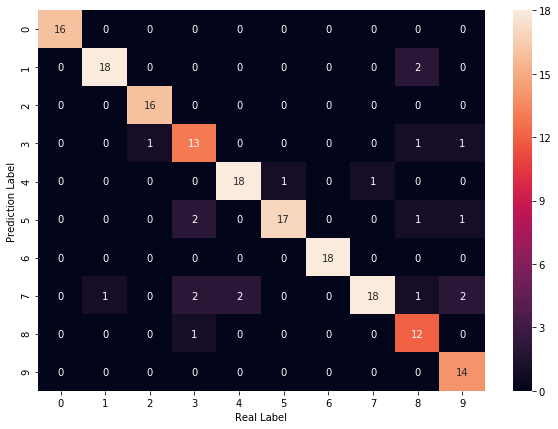

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 20., 16., 16., 20., 21., 18., 26., 13., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:147 index:[5] real:5
#1 min_error:156 index:[3] real:2
#2 min_error:171 index:[1] real:8
#3 min_error:73 index:[0] real:0
#4 min_error:132 index:[1] real:1
#5 min_error:123 index:[7] real:7
#6 min_error:75 index:[6] real:6
#7 min_error:110 index:[3] real:3
#8 min_error:95 index:[2] real:2
#9 min_error:139 index:[1] real:1
#10 min_error:164 index:[7] real:7
#11 min_error:159 index:[7] real:4
#12 min_error:97 index:[6] real:6
#13 min_error:118 index:[3] real:3
#14 min_error:124 index:[1] real:1
#15 min_error:154 index:[3] real:3
#16 min_error:158 index:[7] real:9
#17 min_error:125 index:[1] real:1
#18 min_error:128 index:[7] real:7
#19 min_error:56 index:[6] real:6
#20 min_error:164 index:[8] real:8
#21 min_error:85 index:[4] real:4
#22 min_error:102 index:[3] real:3
#23 min_error:134 index:[1] real:1
#24 min_error:98 index:[4] real:4
#25 min_error:82 index:[0] real:0
#26 min_error:118 index:[5] real:5
#27 min_error:111 index:[3] real:3
#28 min_error:144 index:[6] real:6
#29

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8062 Total connections::7578
